In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import seaborn as sns

pd.set_option('display.max_columns',None)



In [365]:
df = pd.read_csv('E:\Data_Science\data_files\house_pricing_kaggle.csv')

In [366]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [367]:
df.shape

(1460, 81)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

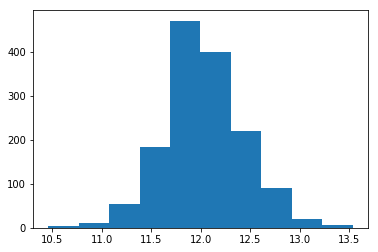

In [369]:
SalePrice = df.SalePrice
plt.hist(np.log(SalePrice))

Total nearly 6% of the data has NA values


In [370]:
df.isnull().sum().sum() / (df.shape[0] * df.shape[1])

0.05889565364451209

In [371]:
def find_null_cols():
    null_columns = df.isnull().sum().sort_values(ascending = False)
    null_columns =  null_columns[null_columns > 0 ]
    print ("Total Number of records ",df.shape[0])
    print ("No of columns with null values", len(null_columns))
    
    print ("Total Columns",null_columns)

find_null_cols()

Total Number of records  1460
No of columns with null values 19
Total Columns PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [372]:
#### Working on Pool QC
 
def find_colums(df , search):
    matched = [c for c in df.columns if search.lower() in c.lower() ]
    return matched
    
find_colums(df , "pool")

['PoolArea', 'PoolQC']

In [373]:
df.query("PoolArea >= 0 and PoolQC != PoolQC").shape

(1453, 81)

In [374]:
df.groupby("PoolQC").PoolArea.agg([np.mean, len])

,mean,len
PoolQC,,
Ex,533.5,2
Fa,583.5,2
Gd,598.0,3


In [326]:
df.query("PoolArea == 0  and PoolQC != PoolQC")[['PoolArea','PoolQC']]

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [375]:
idx = df.query("PoolArea == 0 and PoolQC != PoolQC").index
df.loc[idx, 'PoolQC'] = "None"
df.query("PoolArea >= 0 and PoolQC != PoolQC").shape

(0, 81)

In [376]:
Garage_cols = find_colums(df, 'Garage')
df[Garage_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 79.9+ KB


In [377]:
(df.GarageYrBlt == df.YearBuilt).value_counts()

True     1089
False     371
dtype: int64

In [378]:
df.query("GarageYrBlt != GarageYrBlt ").shape

(81, 81)

In [379]:
idx = df.query("GarageYrBlt != GarageYrBlt ").index
df.loc[idx, "GarageYrBlt"] =  df.loc [idx, "YearBuilt"]
df.query("GarageYrBlt != GarageYrBlt ").shape

(0, 81)

In [380]:
(df.GarageYrBlt == df.YearBuilt).value_counts()

True     1170
False     290
dtype: int64

In [381]:
print(df.GarageYrBlt.sort_values(ascending = False)[:10])
print(df.YearBuilt.sort_values(ascending = False)[:10])

987    2010.0
378    2010.0
819    2010.0
798    2009.0
515    2009.0
507    2009.0
572    2009.0
211    2009.0
103    2009.0
212    2009.0
Name: GarageYrBlt, dtype: float64
378     2010
762     2009
157     2009
515     2009
898     2009
1165    2009
87      2009
211     2009
412     2009
212     2009
Name: YearBuilt, dtype: int64


In [382]:
df[df.GarageYrBlt == 2010][['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
378,2010.0,2010
819,2010.0,2009
987,2010.0,2009


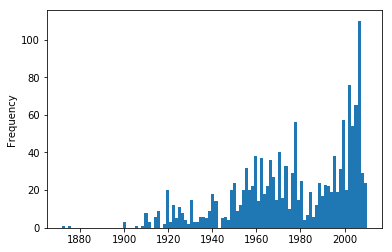

In [383]:
df.GarageYrBlt.plot.hist(bins = 100)

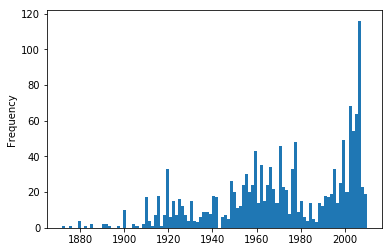

In [384]:
df.YearBuilt.plot.hist(bins = 100)

In [385]:
find_null_cols()

Total Number of records  1460
No of columns with null values 17
Total Columns MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageQual        81
GarageCond        81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [386]:
df[df.GarageArea == 0][['GarageArea','GarageCond','GarageType','GarageFinish']]

idx = df.query("GarageArea == 0").index

df.loc[idx, 'GarageCond'] = "None"
df.loc[idx, 'GarageType'] = "None"
df.loc[idx, 'GarageFinish'] = "None"
df.loc[idx, 'GarageQual'] = "None"


##find_null_cols()

In [339]:
def mostFrequent(col):
    counts = col.value_counts()
    counts = counts.sort_values(ascending = False)
    return  counts.index[0]

mostFrequent(df.BsmtFinType2)

'Unf'

In [387]:
##df.query('BsmtFinType2 != BsmtFinType2').shape

idx = df[df.BsmtFinType1.isnull()]['BsmtFinType1'].index
df.loc[idx, 'BsmtExposure'] = "None"
df.loc[idx, 'BsmtCond'] = "None"
df.loc[idx, 'BsmtFinType1'] = "None"
df.loc[idx, 'BsmtQual'] = "None"
df.loc[idx, 'BsmtFinType2'] = "None"

find_null_cols()

Total Number of records  1460
No of columns with null values 10
Total Columns MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
MasVnrArea         8
MasVnrType         8
BsmtFinType2       1
Electrical         1
BsmtExposure       1
dtype: int64


In [388]:
df[df.BsmtFinType2.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,None,NaN,NaN,0,10,2009,WD,Normal,284000


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [392]:
df.groupby('MSZoning').LotFrontage.agg([len,np.mean])

##df.query ('LotFrontage !=LotFrontage ')[['MSZoning','LotFrontage']][2:20]

##np.mean(df.query('MSZoning == "RL"'))['LotFrontage']

##df[df.MSZoning == "RL"].index

##df[df.isnull()]['LotFrontage']

##df[df.query('MSZoning == "RL"')['LotFrontage'].isnull()]

df[df.LotFrontage.isnull()][["MSZoning", "LotFrontage"]]


,MSZoning,LotFrontage
7,RL,NaN
12,RL,NaN
14,RL,NaN
16,RL,NaN
24,RL,NaN
31,RL,NaN
42,RL,NaN
43,RL,NaN
50,RL,NaN
64,RL,NaN


In [393]:
def find_columns(df, search):
    matched = [c for c in df.columns if search.lower() in c.lower()]
    return matched

find_columns(df, "pool")

['PoolArea', 'PoolQC']

In [394]:
##df.groupby(["MSZoning", "LotFrontage"]).Id.count().unstack()

lot_columns = find_columns(df, "lot")
lot_columns.append("MSZoning")
lot_columns


['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'MSZoning']

In [395]:
lot = ["MSZoning", "LotFrontage"]
df2 = df.groupby("MSZoning").LotFrontage.agg([len,np.mean])
df2

,len,mean
MSZoning,,
C (all),10.0,69.700000
FV,65.0,59.491228
RH,16.0,58.923077
RL,1151.0,74.680043
RM,218.0,52.366834


In [396]:
df.query('MSZoning == "RL" and LotFrontage =="Nan"').index

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            1396, 1407, 1417, 1419, 1423, 1424, 1429, 1431, 1443, 1446],
           dtype='int64', length=229)

In [397]:
def replace_with(df, col, fill_with):
    idx = df[df[col].isnull()].index
    df.loc[idx, col] = fill_with

In [398]:
find_null_cols()

Total Number of records  1460
No of columns with null values 10
Total Columns MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
MasVnrArea         8
MasVnrType         8
BsmtFinType2       1
Electrical         1
BsmtExposure       1
dtype: int64


In [405]:
replace_with(df,"Alley","None")
replace_with(df,"Fence","None")
replace_with(df,"FireplaceQu","None")


In [406]:
find_null_cols()

Total Number of records  1460
No of columns with null values 6
Total Columns MiscFeature     1406
MasVnrType         8
MasVnrArea         8
Electrical         1
BsmtFinType2       1
BsmtExposure       1
dtype: int64


In [407]:
idx = df[df.LotFrontage.isnull()].index

df.loc[idx, 'LotFrontage'] = 74

In [408]:
replace_with(df,"MasVnrType","None")
replace_with(df,"MasVnrArea",0)
replace_with(df,"Electrical","None")

replace_with(df,"BsmtFinType2","None")
replace_with(df,"BsmtExposure","None")
replace_with(df,"MiscFeature", "None")

In [409]:
df.to_csv("E:\Data_Science\data_files\data_combined_cleaned.csv", index = False)

In [410]:
df = pd.read_csv("E:\Data_Science\data_files\data_combined_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [411]:
find_null_cols()

Total Number of records  1460
No of columns with null values 0
Total Columns Series([], dtype: int64)


In [412]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 262 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(224)
memory usage: 752.9 KB


In [413]:
df_training  = df_dummy[~np.isnan(df.SalePrice)]
df_training.shape

(1460, 262)

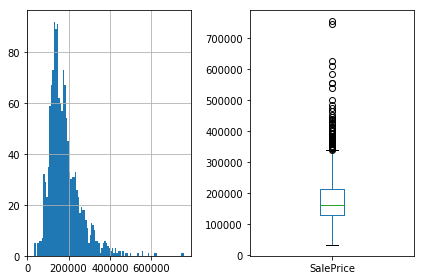

In [414]:
plt.subplot(1, 2, 1)
df_training.SalePrice.hist(bins = 100)

plt.subplot(1, 2, 2)
df_training.SalePrice.plot.box()
plt.tight_layout()

{'boxes': [<matplotlib.lines.Line2D at 0x1f799e7f828>],
 'caps': [<matplotlib.lines.Line2D at 0x1f799eaa080>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f799eaac88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f799eaa320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f799e7fac8>,
  <matplotlib.lines.Line2D at 0x1f799e7fe80>]}

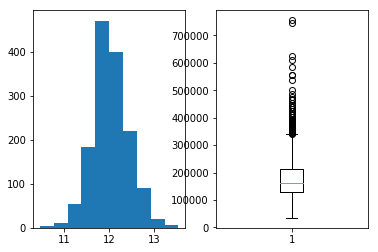

In [415]:
plt.subplot(1,2,1)
plt.hist(np.log(df_training.SalePrice))

plt.subplot(1,2,2)
plt.boxplot(df_training.SalePrice)

In [416]:
y = np.log(df_training.SalePrice.values)
df_tmp = df_training.copy()
del df_tmp["SalePrice"]
del df_tmp["Id"]
x = df_tmp.values

In [417]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [418]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [310]:
##scaler = StandardScaler()
##X_train_std = scaler.fit_transform(X_train)
##X_test_std = scaler.fit_transform(X_test)

In [419]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rmse(y_test, lm.predict(X_test))

0.19080899997187986

In [422]:
y_test_pred = lm.predict(X_test)

In [425]:
output = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
output["error"] = output.actual - output.prediction
output

,actual,prediction,error
0,12.352335,12.291345,0.060990
1,12.097930,11.995450,0.102481
2,11.711776,11.648531,0.063245
3,11.344507,11.307038,0.037469
4,11.863582,11.760272,0.103310
5,12.693499,12.792920,-0.099422
6,12.560244,12.598256,-0.038011
7,11.925035,11.993948,-0.068913
8,12.180755,12.231434,-0.050679
9,12.524526,12.400439,0.124087


In [432]:
from sklearn.metrics import r2_score

In [433]:
r2_score(y_test, y_test_pred)

0.8073539747819538